# Testeando el Parámetro de Exploración

In [1]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
# Permitir acceso a Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import sys
import os
from functools import reduce

# Buscar la ruta donde está el proyecto, cambiar en caso de ser necesario
project_path = os.path.abspath('/content/drive/MyDrive/Colab Notebooks/RL-Cacho-main')
sys.path.insert(1, project_path)

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [4]:
project_path

'/content/drive/MyDrive/Colab Notebooks/RL-Cacho-main'

In [5]:
import math
import random
from collections import namedtuple, deque
from itertools import count, product
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T


# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
# Buscar la ruta donde está el proyecto, cambiar en caso de ser necesario
os.chdir('/content/drive/My Drive/Colab Notebooks/RL-Cacho-main/')
print("Directorio actual:", os.getcwd())

Directorio actual: /content/drive/My Drive/Colab Notebooks/RL-Cacho-main


In [7]:
from src.models.EnvironmentCachos import NPC, Strategic_NPC, AmbienteCacho
from src.models.Agents import AgentTable, Agent, Agent_SARSA, Agent_QLearning
from src.models.utils import train_over_games, play_one_game, plot_winrate, winrate_every, plot_time_per_game, Q_plot, plot_epsilon, plot_multi

# Evolución del WinRate en función del Epsilon

In [9]:
def fixed_combo(game_env, n_games, every, epsilon0, epsdecay, epsmin, mode):
    gamma = 0.99
    lr = 0.1
    agente_QLearning = Agent_QLearning(gamma = gamma, epsilon = epsilon0, lr = lr, game_env = game_env, eps_end = epsmin, eps_dec = epsdecay, eps_method = mode, name =  "Agente QLearning")
    scores, eps_hist, times = train_over_games(game_env, agente_QLearning, n_games, mode = "1-step", verbose = False)
    agente_QLearning.save_table(project_path+"/models/QTable_mode_{}_eps0_{}_epsdec_{}_epsmin_{}".format(mode, epsilon0, epsdecay, epsmin))
    return scores, eps_hist, times

def explore_epsilon(combis, mode = "Lineal", sett=0):
    # Bajar n_games si tarda mucho en ejecutar
    n_games = 1000
    every = n_games//100
    game_env = AmbienteCacho(2, NPC_type = Strategic_NPC)
    scores_dict = {"x": every* np.arange(n_games//every)}
    times_dict = {"x": np.arange(n_games)}
    epsilon_dict = {"x": np.arange(n_games)}
    for i, (epsilon0, epsdecay, epsmin) in enumerate(combis):
                    scores, eps_hist, times = fixed_combo(game_env, n_games, every, epsilon0, epsdecay, epsmin, mode)
                    scores_dict["{} (decay = {})".format(i+1, epsdecay)] = winrate_every(scores, every)
                    times_dict["{} (decay = {})".format(i+1, epsdecay)] = times
                    epsilon_dict["{} (decay = {})".format(i+1, epsdecay)] = eps_hist
    df_wr = pd.DataFrame(scores_dict)
    df_times = pd.DataFrame(times_dict)
    df_epsilons = pd.DataFrame(epsilon_dict)

    #Ploteos
    plot_winrate(df_wr, every, save = project_path+"/reports/figures/WR_mode_{}_games_{}_{}".format(mode, n_games, sett))
    plot_time_per_game(df_times, m = every, save = project_path+"/reports/figures/Time_mode_{}_games_{}_{}".format(mode, n_games, sett))
    print(df_times.mean())
    plot_epsilon(df_epsilons, m = every, metodo = mode, save = project_path+"/reports/figures/Epsilon_mode_{}_games_{}_{}".format(mode, n_games, sett))
    #plot_multi(df_wr, df_epsilons)

In [10]:
# Bajar n_games si tarda mucho en ejecutar
n_games = 1000
every = n_games//100
gamma = 0.99
epsilon0 = 1
epsdecay = 0.01
epsmin = 0.001
mode = "Lineal"
lr = 0.1
scores_dict = {"x": every* np.arange(n_games//every)}
times_dict = {"x": np.arange(n_games)}
epsilon_dict = {"x": np.arange(n_games)}
game_env = AmbienteCacho(2, NPC_type = Strategic_NPC)

## Agente Tabular Entrenado con QLearning

In [11]:
agente_QLearning = Agent_QLearning(gamma = gamma, epsilon = epsilon0, lr = lr, game_env = game_env, eps_end = epsmin, eps_dec = epsdecay, eps_method = mode, name =  "Agente QLearning")
scores, eps_hist, times = train_over_games(game_env, agente_QLearning, n_games, mode = "1-step", verbose = False)
print(np.mean(scores))
scores_dict["0, mode={}".format(epsilon0, epsdecay, epsmin, mode)] = winrate_every(scores, every)
times_dict["0, mode={}".format(epsilon0, epsdecay, epsmin, mode)] = times
epsilon_dict["0, mode={}".format(epsilon0, epsdecay, epsmin, mode)] = eps_hist

----------------------------------------
Creando el Juego 1
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.92
Tiempo por iteración (promedio últimos 100 episodios): 0.0054 s
----------------------------------------
Creando el Juego 11
Resultados Parciales:
Winrate (últimos 100 episodios): 0.09
Epsilon actual: 0.18
Tiempo por iteración (promedio últimos 100 episodios): 0.0029 s
----------------------------------------
Creando el Juego 21
Resultados Parciales:
Winrate (últimos 100 episodios): 0.05
Epsilon actual: 0.001
Tiempo por iteración (promedio últimos 100 episodios): 0.0028 s
----------------------------------------
Creando el Juego 31
Resultados Parciales:
Winrate (últimos 100 episodios): 0.03
Epsilon actual: 0.001
Tiempo por iteración (promedio últimos 100 episodios): 0.0026 s
----------------------------------------
Creando el Juego 41
Resultados Parciales:
Winrate (últimos 100 episodios): 0.02
Epsilon actual: 0.001
Tiempo por iteración (promedio úl

In [12]:
df_wr = pd.DataFrame(scores_dict)
df_times = pd.DataFrame(times_dict)
df_epsilons = pd.DataFrame(epsilon_dict)

<Axes: ylabel='Winrate'>

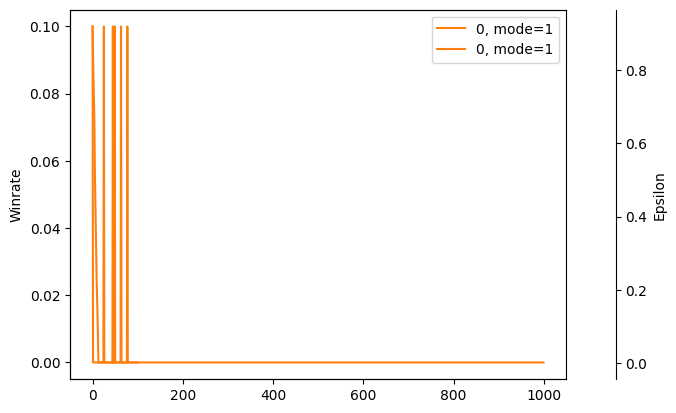

In [13]:
plot_multi(df_wr, df_epsilons)

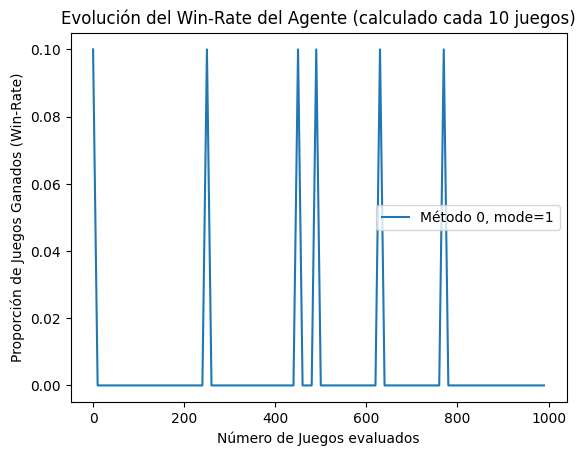

In [14]:
plot_winrate(df_wr, every, save = project_path+"/reports/figures/TEST_WR_mode_{}_games_{}".format(mode, n_games))

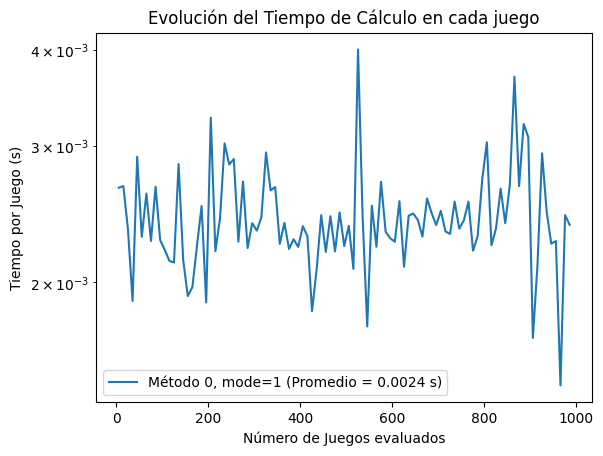

x            499.500000
0, mode=1      0.002432
dtype: float64


In [15]:
plot_time_per_game(df_times, m = every)
print(df_times.mean())

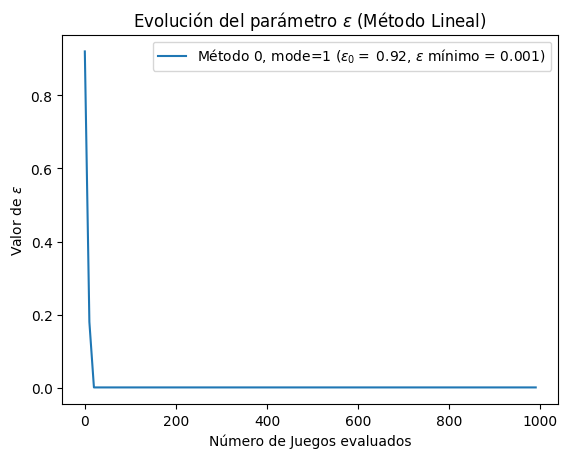

In [16]:
plot_epsilon(df_epsilons, m = every, metodo = "Lineal")

----------------------------------------
Creando el Juego 1
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.9998
Tiempo por iteración (promedio últimos 100 episodios): 0.0018 s
----------------------------------------
Creando el Juego 11
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.9961
Tiempo por iteración (promedio últimos 100 episodios): 0.0021 s
----------------------------------------
Creando el Juego 21
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.9928
Tiempo por iteración (promedio últimos 100 episodios): 0.0021 s
----------------------------------------
Creando el Juego 31
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.9893
Tiempo por iteración (promedio últimos 100 episodios): 0.0022 s
----------------------------------------
Creando el Juego 41
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.9854
Tiempo por iteración (promedio

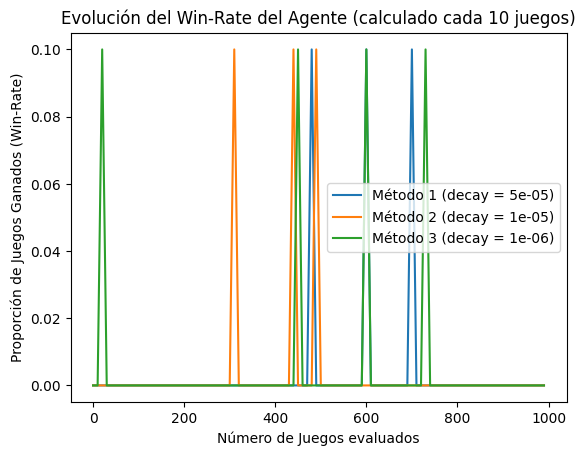

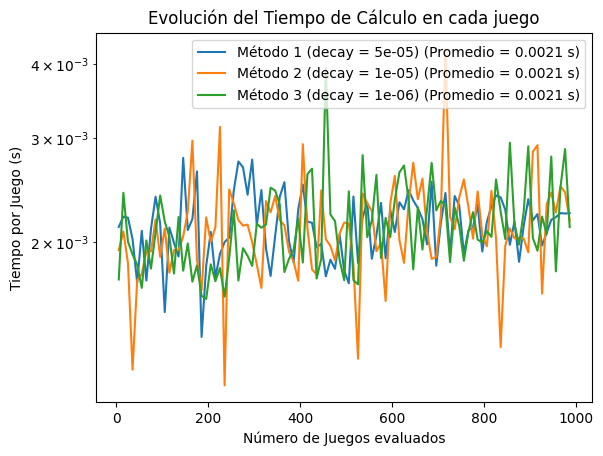

x                    499.500000
1 (decay = 5e-05)      0.002136
2 (decay = 1e-05)      0.002126
3 (decay = 1e-06)      0.002117
dtype: float64


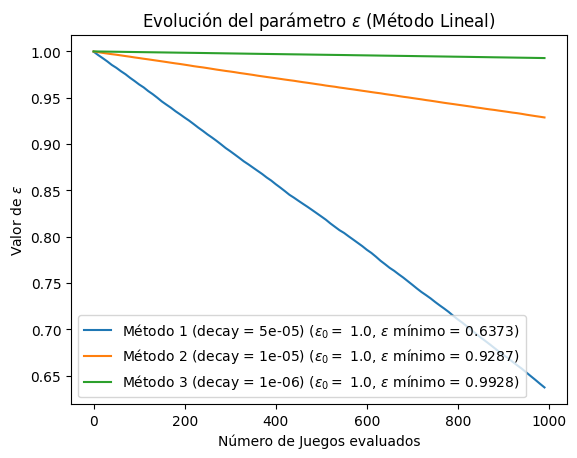

In [17]:
# eps0, epsdecay, epsmin
combis_L = [(1, 0.00005, 0.0001), (1, 0.00001, 0.00001), (1, 0.000001, 0.00001)]
explore_epsilon(combis_L, mode = "Lineal", sett = 1)

----------------------------------------
Creando el Juego 1
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.4999
Tiempo por iteración (promedio últimos 100 episodios): 0.004 s
----------------------------------------
Creando el Juego 11
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.4993
Tiempo por iteración (promedio últimos 100 episodios): 0.0024 s
----------------------------------------
Creando el Juego 21
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.4984
Tiempo por iteración (promedio últimos 100 episodios): 0.0025 s
----------------------------------------
Creando el Juego 31
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.4976
Tiempo por iteración (promedio últimos 100 episodios): 0.0024 s
----------------------------------------
Creando el Juego 41
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.4969
Tiempo por iteración (promedio 

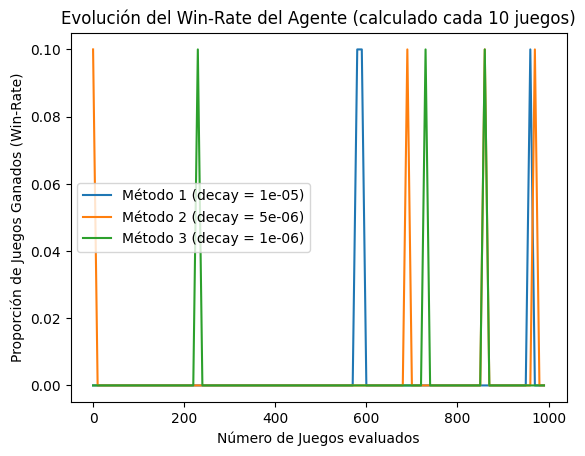

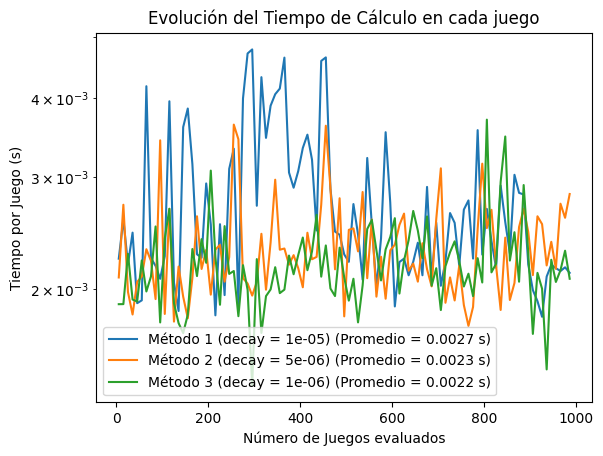

x                    499.500000
1 (decay = 1e-05)      0.002709
2 (decay = 5e-06)      0.002319
3 (decay = 1e-06)      0.002192
dtype: float64


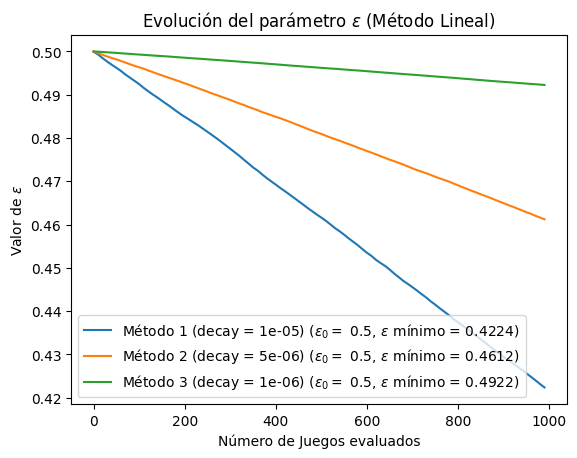

In [18]:
combis_L2 = [(0.5, 0.00001, 0.0001), (0.5, 0.000005, 0.00001), (0.5, 0.000001, 0.00001)]
explore_epsilon(combis_L2, mode = "Lineal", sett = 2)

----------------------------------------
Creando el Juego 1
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.9997
Tiempo por iteración (promedio últimos 100 episodios): 0.002 s
----------------------------------------
Creando el Juego 11
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.9959
Tiempo por iteración (promedio últimos 100 episodios): 0.0014 s
----------------------------------------
Creando el Juego 21
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.9921
Tiempo por iteración (promedio últimos 100 episodios): 0.0017 s
----------------------------------------
Creando el Juego 31
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.9884
Tiempo por iteración (promedio últimos 100 episodios): 0.0018 s
----------------------------------------
Creando el Juego 41
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.9849
Tiempo por iteración (promedio 

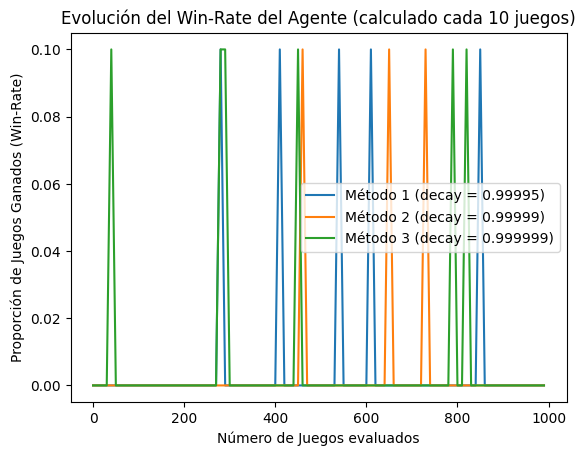

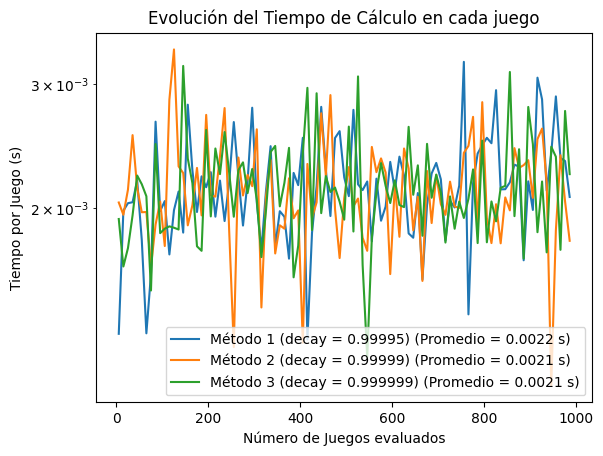

x                       499.500000
1 (decay = 0.99995)       0.002152
2 (decay = 0.99999)       0.002123
3 (decay = 0.999999)      0.002128
dtype: float64


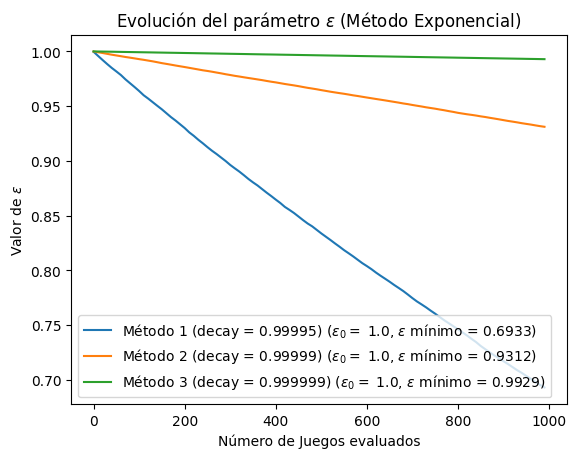

In [19]:
# eps0, epsdecay, epsmin
combis_E = [(1, 0.99995, 0.0001), (1, 0.99999, 0.00001), (1, 0.999999, 0.00001), ]
explore_epsilon(combis_E, mode = "Exponencial", sett = 1)

----------------------------------------
Creando el Juego 1
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.5
Tiempo por iteración (promedio últimos 100 episodios): 0.0012 s
----------------------------------------
Creando el Juego 11
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.4997
Tiempo por iteración (promedio últimos 100 episodios): 0.0012 s
----------------------------------------
Creando el Juego 21
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.4993
Tiempo por iteración (promedio últimos 100 episodios): 0.0015 s
----------------------------------------
Creando el Juego 31
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.499
Tiempo por iteración (promedio últimos 100 episodios): 0.0018 s
----------------------------------------
Creando el Juego 41
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.4986
Tiempo por iteración (promedio últ

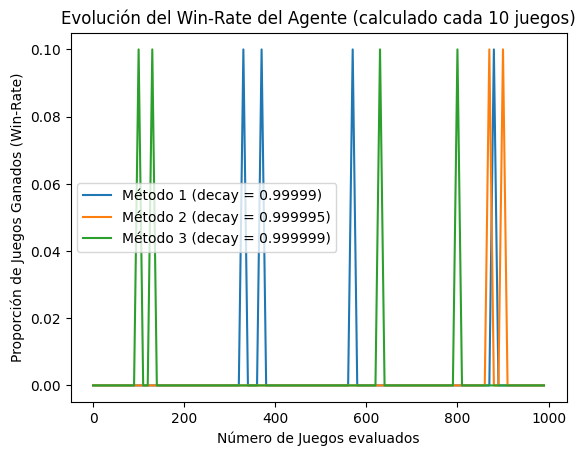

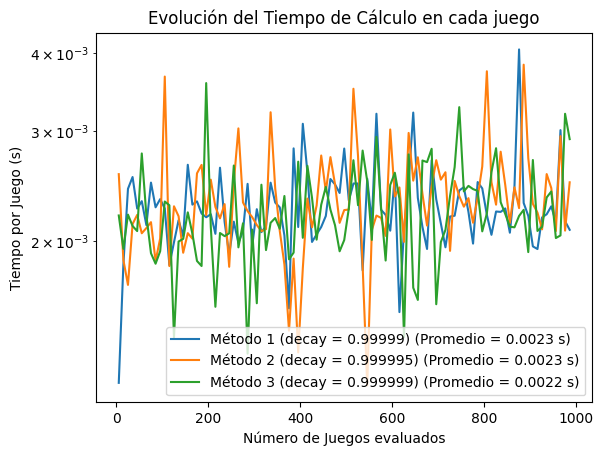

x                       499.500000
1 (decay = 0.99999)       0.002263
2 (decay = 0.999995)      0.002328
3 (decay = 0.999999)      0.002226
dtype: float64


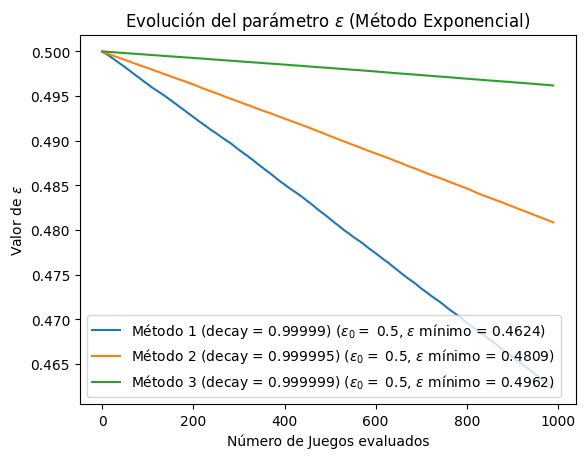

In [20]:
combis_E2 =[(0.5, 0.99999, 0.0001), (0.5, 0.999995, 0.00001), (0.5, 0.999999, 0.00001)]
explore_epsilon(combis_E2, mode = "Exponencial", sett = 2)

----------------------------------------
Creando el Juego 1
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.9997
Tiempo por iteración (promedio últimos 100 episodios): 0.003 s
----------------------------------------
Creando el Juego 11
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.9964
Tiempo por iteración (promedio últimos 100 episodios): 0.0018 s
----------------------------------------
Creando el Juego 21
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.993
Tiempo por iteración (promedio últimos 100 episodios): 0.0019 s
----------------------------------------
Creando el Juego 31
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.9894
Tiempo por iteración (promedio últimos 100 episodios): 0.002 s
----------------------------------------
Creando el Juego 41
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.9858
Tiempo por iteración (promedio úl

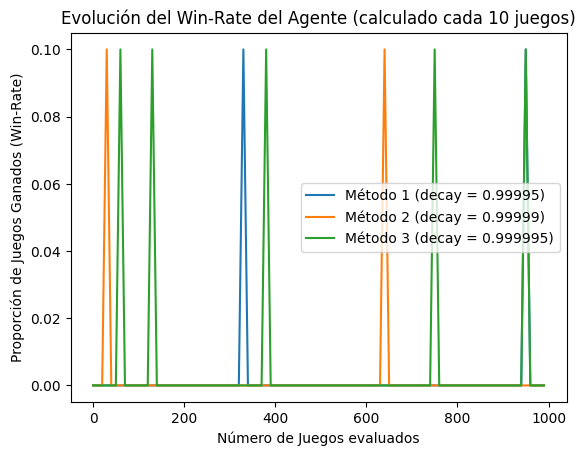

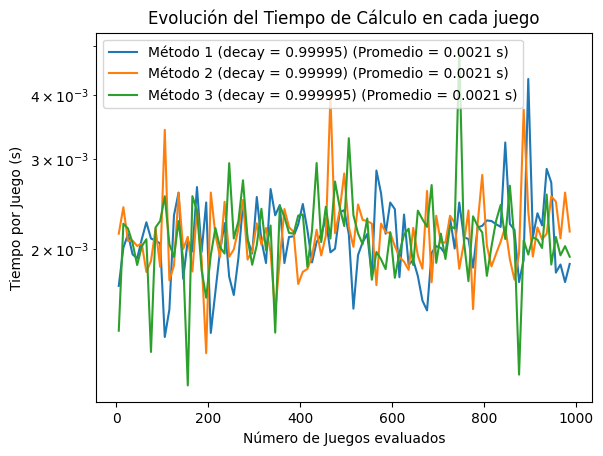

x                       499.500000
1 (decay = 0.99995)       0.002134
2 (decay = 0.99999)       0.002142
3 (decay = 0.999995)      0.002138
dtype: float64


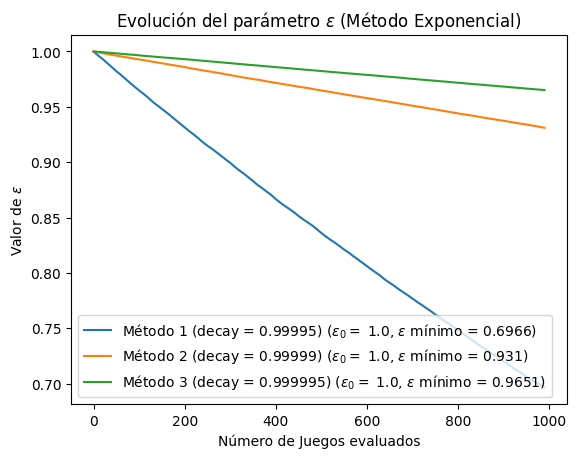

In [21]:
# eps0, epsdecay, epsmin
combis_E3 = [(1, 0.99995, 0.0001), (1, 0.99999, 0.00001), (1, 0.999995, 0.00001), ]
explore_epsilon(combis_E3, mode = "Exponencial", sett = 3)

----------------------------------------
Creando el Juego 1
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.5
Tiempo por iteración (promedio últimos 100 episodios): 0.0035 s
----------------------------------------
Creando el Juego 11
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.4996
Tiempo por iteración (promedio últimos 100 episodios): 0.0026 s
----------------------------------------
Creando el Juego 21
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.4992
Tiempo por iteración (promedio últimos 100 episodios): 0.0025 s
----------------------------------------
Creando el Juego 31
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.4989
Tiempo por iteración (promedio últimos 100 episodios): 0.0023 s
----------------------------------------
Creando el Juego 41
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.4985
Tiempo por iteración (promedio úl

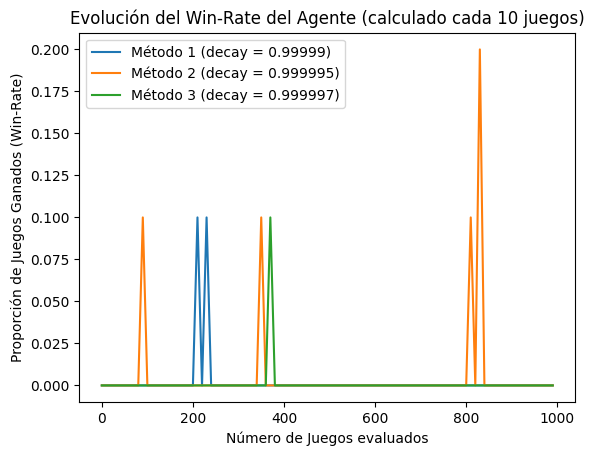

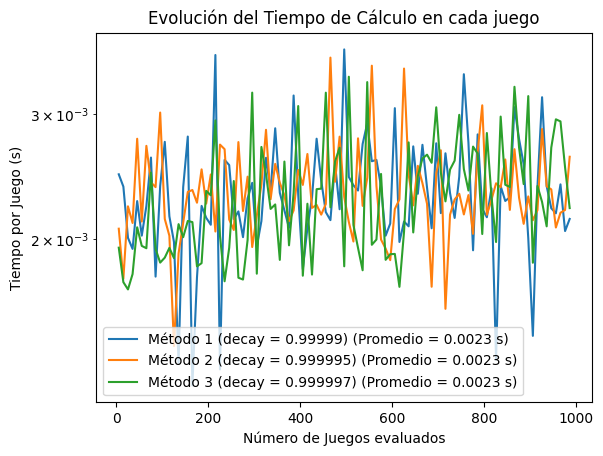

x                       499.500000
1 (decay = 0.99999)       0.002331
2 (decay = 0.999995)      0.002338
3 (decay = 0.999997)      0.002297
dtype: float64


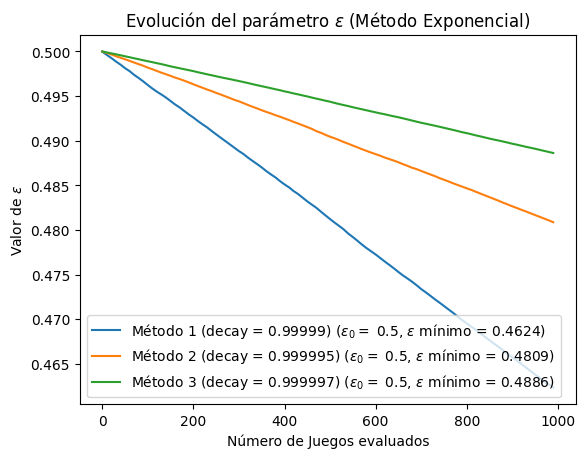

In [22]:
combis_E4 =[(0.5, 0.99999, 0.0001), (0.5, 0.999995, 0.00001), (0.5, 0.999997, 0.00001)]
explore_epsilon(combis_E4, mode = "Exponencial", sett = 4)

In [23]:
#agente_QLearning.load_table(project_path+"/models/QTable_mode_Lineal_eps0_1_epsdec_0.001_epsmin_0.001")
agente_QLearning.load_table(project_path+"/models/QTable_mode_Exponencial_eps0_1_epsdec_0.999_epsmin_0.001")

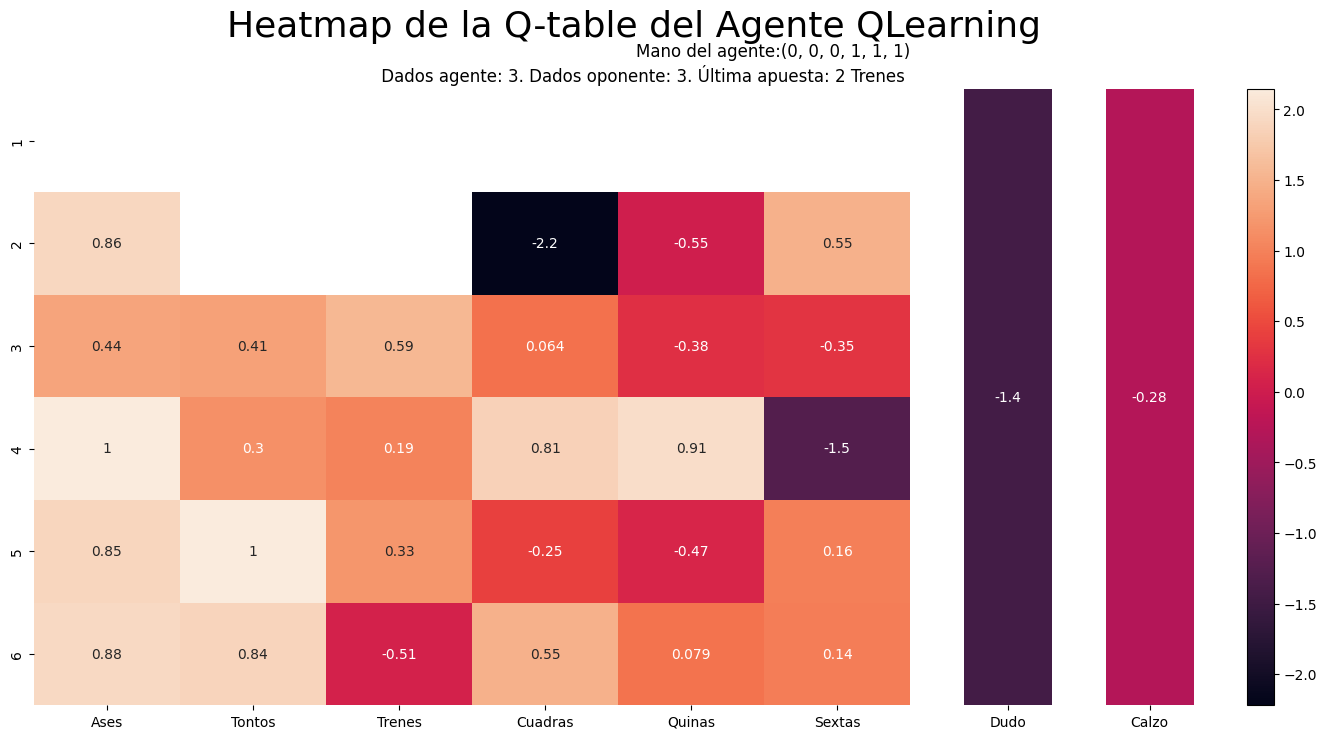

In [24]:
estado = ((0,0,0,1,1,1),(3,3), (2, "Trenes"))
Q_plot(agente_QLearning, estado)

# Guardando las Q_Tables asociadas a los agentes en archivos

In [23]:
# Cambiar los agentes más arriba por MC o SARSA
#agente_MC.save_table(project_path+"/models/QTable_AgentMC")
#agente_SARSA.save_table(project_path+"/models/QTable_AgentSARSA")
agente_QLearning.save_table(project_path+"/models/QTable_AgentQLearning")

# Visualización de las Q_Tables

## Cargando Modelos Preentrenados

In [24]:
# Cambiar los agentes más arriba por MC o SARSA
#agente_MC.load_table(project_path+"/models/QTable_AgentMC")
#agente_SARSA.load_table(project_path+"/models/QTable_AgentSARSA")
agente_QLearning.load_table(project_path+"/models/QTable_AgentQLearning")

## Visualizando las tablas de reward por acción en un estado fijo

In [25]:
estado = ((0,0,0,1,1,1),(3,3), (2, "Trenes"))

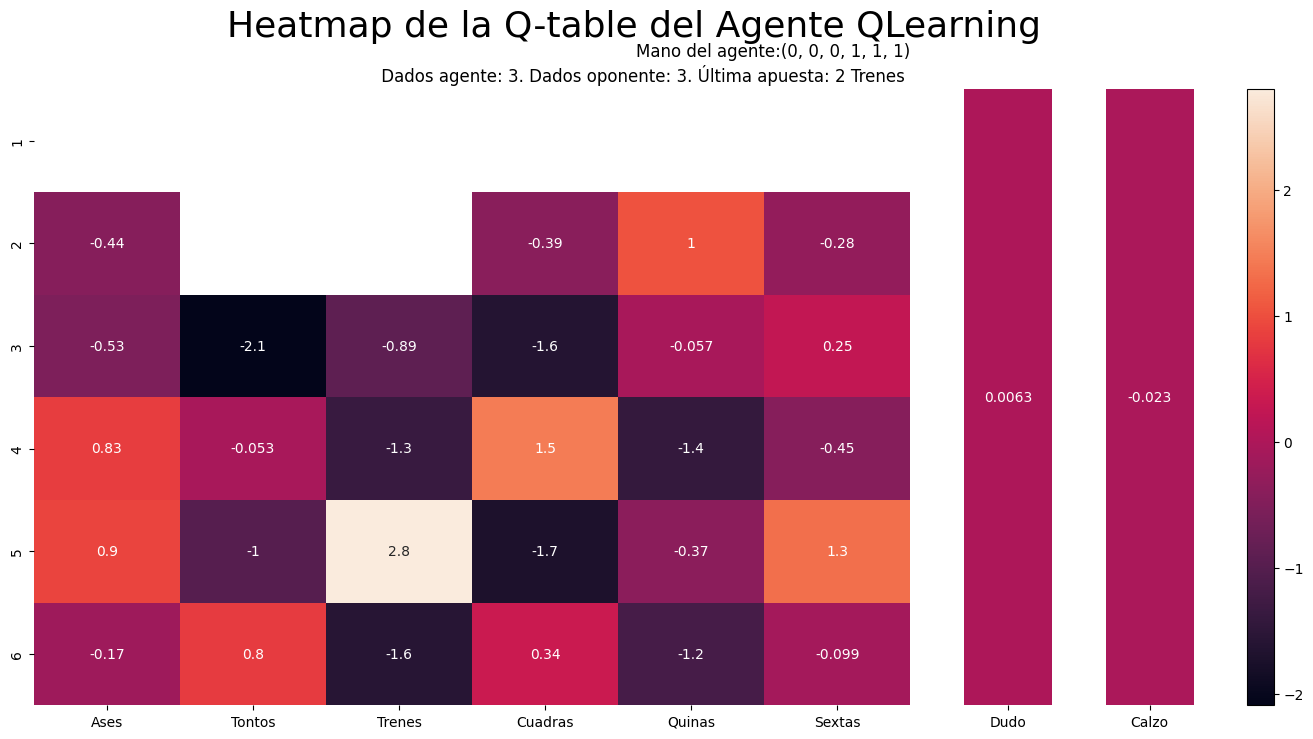

In [26]:
# Cambiar los agentes más arriba por MC o SARSA
#Q_plot(agente_MC, estado)
#Q_plot(agente_SARSA, estado)
Q_plot(agente_QLearning, estado)

## Visión del agente al Jugar un Juego:

In [27]:
# # Cambiar los agentes más arriba por MC o SARSA
#play_one_game(game_env, agente_MC, verbose = True, graphs = True, tabular = True)

# Uso de Deep QLearning

In [28]:
# Bajar n_games si tarda mucho en ejecutar
n_games = 1000
every = n_games//100
gamma = 0.99
epsilon0 = 1.
epsdecay = 1e-3
lr = 0.001
scores_dict = {"x": every* np.arange(n_games//every)}
times_dict = {"x": np.arange(n_games)}
epsilon_dict = {"x": np.arange(n_games)}
game_env = AmbienteCacho(2, NPC_type = Strategic_NPC)

In [29]:
agente_DQN = Agent(gamma=gamma, epsilon=epsilon0, batch_size=64, game_env= game_env, eps_dec=epsdecay, eps_end=0.01, input_dims=[10], lr=lr)
print(agente_DQN.Q_eval)

DeepQNetwork(
  (fc1): Linear(in_features=10, out_features=256, bias=True)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=128, out_features=68, bias=True)
  (loss): MSELoss()
)


In [30]:
scores, eps_hist, times = train_over_games(game_env, agente_DQN, n_games, mode = "Deep", Target_Update = 10000, verbose = False)
print(np.mean(scores))
scores_dict["Deep QLearning"] = winrate_every(scores, every)
times_dict["Deep QLearning"] = times
epsilon_dict["Deep QLearning"] = eps_hist

----------------------------------------
Creando el Juego 1
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 1.0
Tiempo por iteración (promedio últimos 100 episodios): 0.0112 s
----------------------------------------
Creando el Juego 11
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.979
Tiempo por iteración (promedio últimos 100 episodios): 0.0341 s
----------------------------------------
Creando el Juego 21
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.908
Tiempo por iteración (promedio últimos 100 episodios): 0.0376 s
----------------------------------------
Creando el Juego 31
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.835
Tiempo por iteración (promedio últimos 100 episodios): 0.0377 s
----------------------------------------
Creando el Juego 41
Resultados Parciales:
Winrate (últimos 100 episodios): 0.0
Epsilon actual: 0.751
Tiempo por iteración (promedio último

In [31]:
df_wr = pd.DataFrame(scores_dict)
df_times = pd.DataFrame(times_dict)
df_epsilons = pd.DataFrame(epsilon_dict)

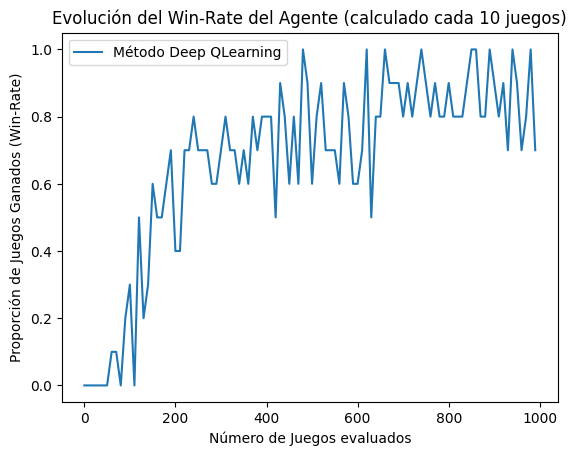

In [32]:
plot_winrate(df_wr, every)

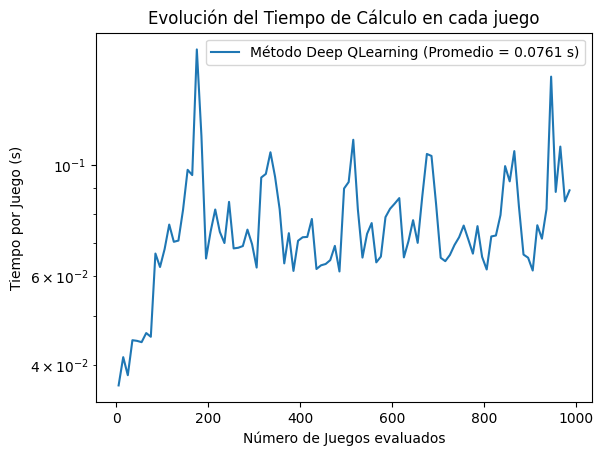

x                 499.500000
Deep QLearning      0.077444
dtype: float64


In [33]:
plot_time_per_game(df_times, m = every)
print(df_times.mean())

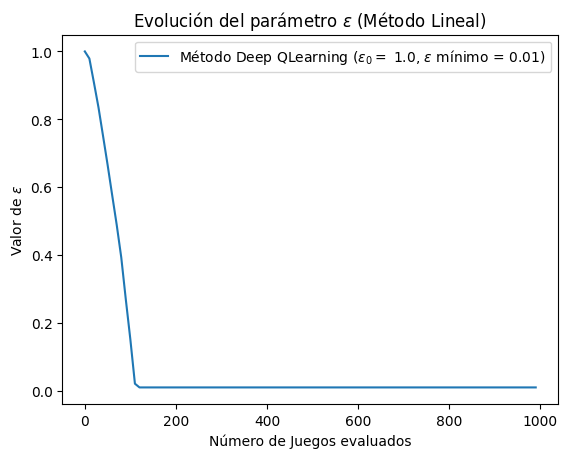

In [34]:
plot_epsilon(df_epsilons, m = every, metodo = "Lineal")

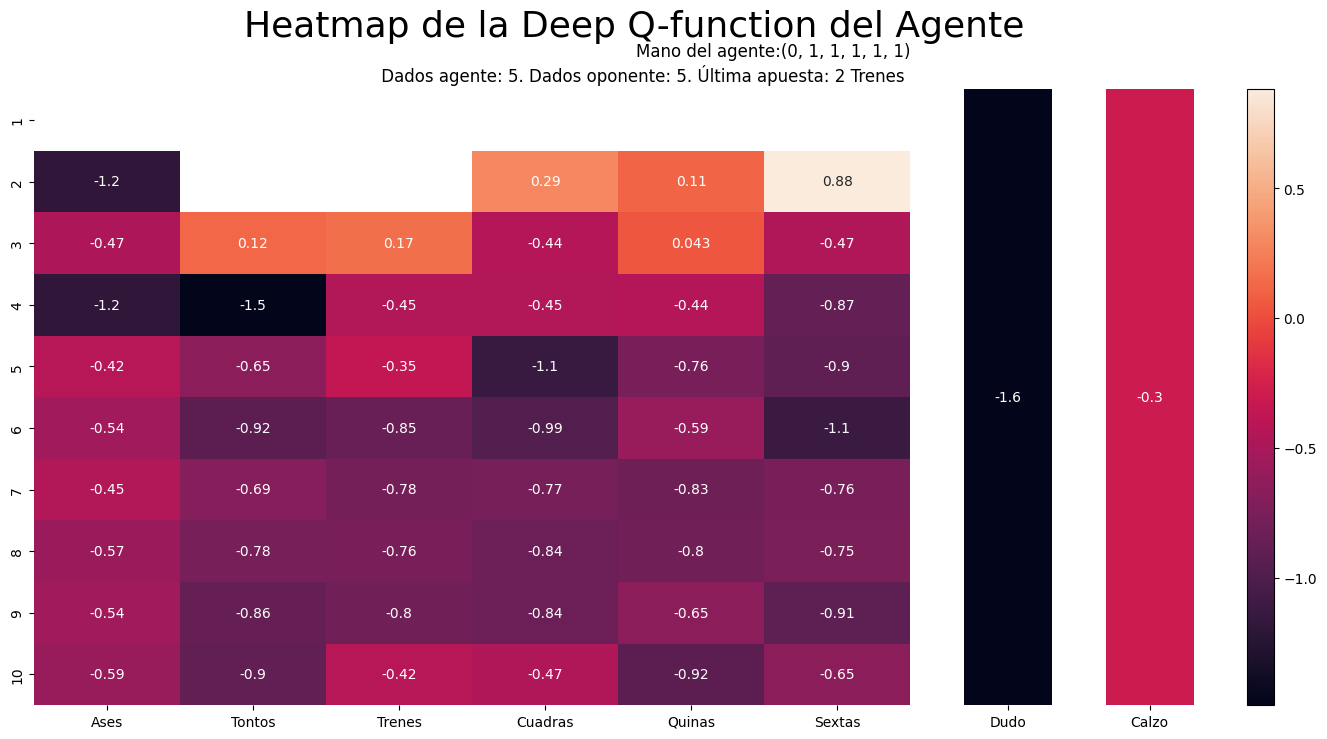

In [35]:
Q_plot(agente_DQN, ((0,1,1,1,1,1),(5,5), (2, "Trenes")), tabular = False)

In [36]:
# Buscar la ruta donde está el proyecto, cambiar en caso de ser necesario
agente_DQN.save("/content/drive/MyDrive/Colab Notebooks/RL-Cacho-main/models/QNetwork_{}eps_{}dec.pt".format(n_games, epsdecay))